### Importing our libraries

In [48]:
import matplotlib
import matplotlib.pylab as plt
matplotlib.style.use('seaborn')
%matplotlib inline
from matplotlib.pylab import rcParams
from plotly.graph_objs import *
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn import preprocessing,cross_validation
from matplotlib import style
import datetime
import math
from datetime import date
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Function for getting stocks by specifying company name(cmpyname) and time period(k).

In [49]:
def Stock_name(cmpyname,k):
    from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data
    params = [{'q':cmpyname}]
    period = "5Y"
    df = get_prices_data(params, period)
    forecast_col = cmpyname+'_Close'
    df.fillna(-99999,inplace=True)
    forecast_out = int(math.ceil(k*0.01*len(df)))
    df['label']=df[forecast_col].shift(-forecast_out)
    X = np.array(df.drop([cmpyname+'_Close'],1))
    X = X[:-forecast_out]
    X_lately = X[-forecast_out:]
    df.dropna(inplace=True)
    Y = np.array(df['label'])
    clf = LinearRegression(n_jobs=-1)
    X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.2)
    clf.fit(X_train, Y_train)
    accuracy = clf.score(X_test, Y_test)
    style.use('ggplot')
    forecast_set = clf.predict(X_lately)
    df['Forecast'] = np.nan
    d = df.iloc[-1].name
    last_date=datetime.combine(d, datetime.min.time())
    last_unix = last_date.timestamp()
    one_day = 86400
    next_unix = last_unix + one_day
    for i in forecast_set:
        next_date = datetime.fromtimestamp(next_unix)
        next_unix += 86400
        df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
    df.reset_index(level=None,inplace=True)
    df=df.rename(index=str, columns={"index": "Date"})
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    plt.figure(figsize=(20,8))
    df[cmpyname+'_Close'].plot()
    df['Forecast'].plot()
    plt.legend(loc=4)
    plt.xlabel('Date')
    plt.ylabel('Price')
    df['Forecast'].plot()
    df.reset_index(level=None,inplace=True)
    return(df)
    

,Date,FB_Open,FB_High,FB_Low,FB_Close,FB_Volume,label,Forecast
0,2013-04-29 00:00:00,27.1600,27.410,26.860,26.9800,29201070.0,25.810,NaN
1,2013-04-30 00:00:00,27.1300,27.850,27.005,27.7690,36245633.0,25.910,NaN
2,2013-05-01 00:00:00,27.8500,27.915,27.310,27.4300,64567590.0,26.280,NaN
3,2013-05-02 00:00:00,28.0099,29.020,27.980,28.9700,104256921.0,26.320,NaN
4,2013-05-03 00:00:00,29.0400,29.070,28.150,28.3110,58506376.0,26.650,NaN
5,2013-05-06 00:00:00,28.3300,28.460,27.480,27.5700,43939307.0,26.180,NaN
6,2013-05-07 00:00:00,27.5500,27.850,26.850,26.8890,41259083.0,25.881,NaN
7,2013-05-08 00:00:00,26.8800,27.300,26.650,27.1200,34654851.0,26.045,NaN
8,2013-05-09 00:00:00,27.0800,27.550,26.850,27.0400,33457150.0,26.130,NaN
9,2013-05-10 00:00:00,27.1400,27.300,26.570,26.6800,30847022.0,26.510,NaN


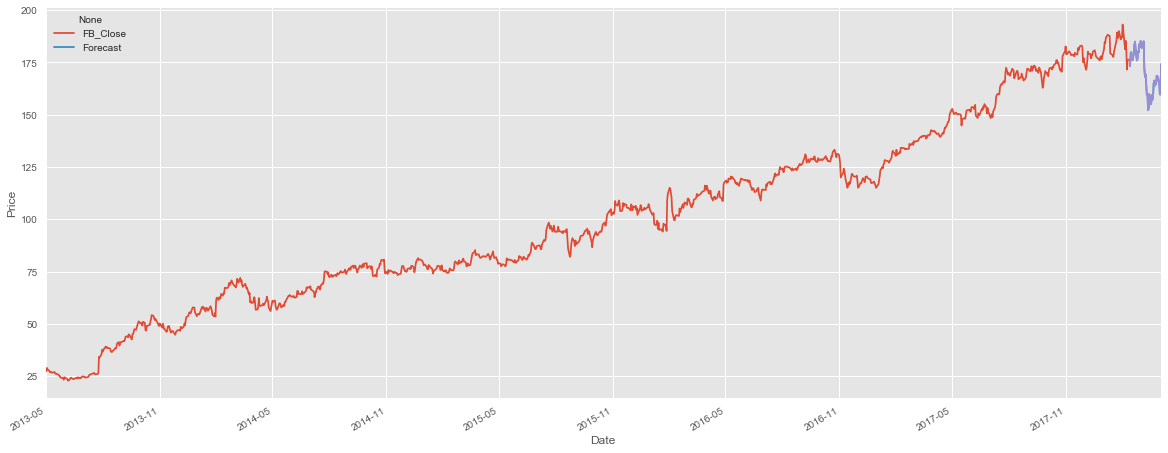

In [50]:
Stock_name('FB',4)